In [124]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [125]:
data = pd.read_csv('Fraud.csv')

In [126]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [127]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [128]:
data.shape

(6362620, 11)

Analysing Dataset

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [130]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [131]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [132]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [133]:
legit = len(data[data.isFraud==0])
Fraud = len(data[data.isFraud==1])
print("No of Legit Transaction: ",legit)
print("No of Fraud Transaction: ",Fraud)

No of Legit Transaction:  6354407
No of Fraud Transaction:  8213


In [134]:
L_percent = (legit/len(data.isFraud)) *100
F_percent = (Fraud/len(data.isFraud))*100

In [135]:
L_percent,F_percent

(99.87091795518198, 0.12908204481801522)

Finding Correlation between Features

C:\Users\Snaehath\AppData\Local\Temp\ipykernel_9188\2352661815.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

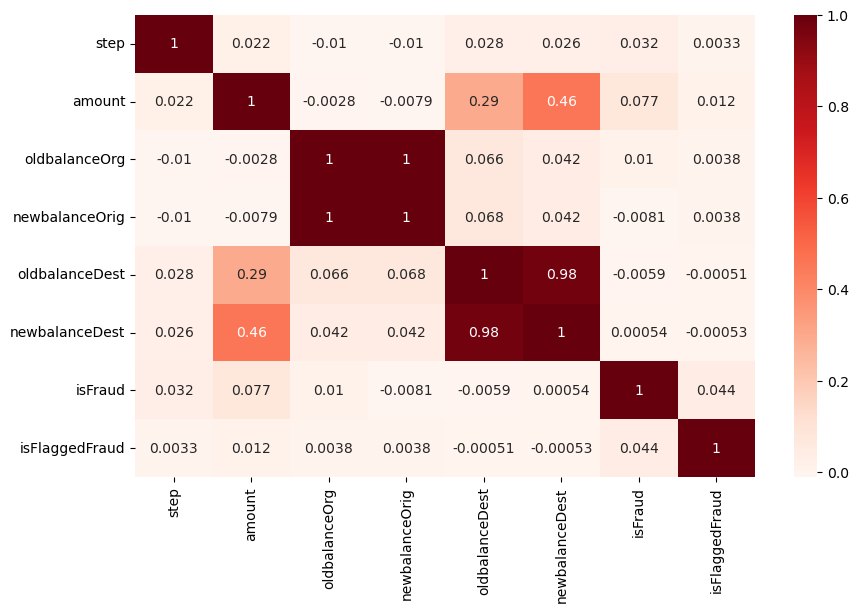

In [136]:
corr=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Reds')

In [138]:
df = data.copy()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [140]:
obj_feat = df.select_dtypes(include="object").columns

Converting Obj datatype to numeric

In [141]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for features in obj_feat:
    df[features] = LE.fit_transform(df[features].astype(str))

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


Checking for Multi-colinearity

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [144]:
calc_vif(df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


Combining Features with correlation

In [145]:
df['New_amountOrig'] = df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df['New_amountDest'] = df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df['TransacPath'] = df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

Dropping the features with lowest correlation

In [146]:
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

In [147]:
calc_vif(df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,New_amountOrig,1.307910
5,New_amountDest,3.754335
6,TransacPath,2.677167


<Axes: >

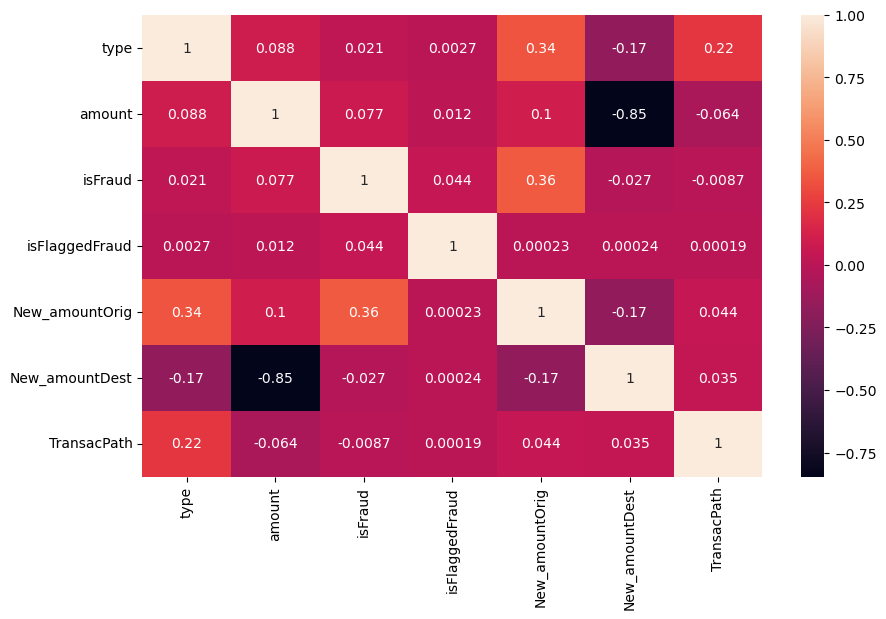

In [148]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["amount"].values.reshape(-1, 1))
df.drop(["amount"], inplace= True, axis= 1)

In [164]:
df.head()

,type,isFraud,isFlaggedFraud,New_amountOrig,New_amountDest,TransacPath,NormalizedAmount
0,3,0,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,0,1864.28,0.0,3922922.0,-0.294767
2,4,1,0,181.00,0.0,1441841.0,-0.297555
3,1,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,0,11668.14,0.0,4274900.0,-0.278532


Assigning Output and Input features to variables

In [165]:
Y = df["isFraud"]
X = df.drop(["isFraud"], axis= 1)

Splitting the dataset at a ratio of 80 : 20

In [168]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 6)
Shape of X_test:  (1272524, 6)


We have selected Decision Tree and Random Forest Classifier as our models.
reason for selecting these models is imbalance in data which was calculated and observed as percentage of legit and fraud transaction

In [169]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree.score(X_test, Y_test) * 100

99.92400929176975

In [170]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_test, Y_test) * 100

99.95921491461066

The model score for both the models where almost same to select one with high precison and score we can calculate classification report

In [171]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.70      0.71      0.71      1620

    accuracy                           1.00   1272524
   macro avg       0.85      0.86      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



In [172]:
classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.71      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



We can observe that random forest classifier has more precision than decision tress